In [104]:
import numpy as np
import matplotlib.pyplot as pl
import qnm_filter
import qnm
import re

In [105]:
file = open("BBH:1107_realisation0.txt")
header = file.readline()[2:]
mass_patt = r"remnant_mass=(\d+\.\d+),"
remnant_mass = float(re.search(mass_patt, header).group(1))
mass = qnm_filter.Filter.mass_unit(remnant_mass)
chi_patt = r"remnant_chi=(\d+\.\d+),"
remnant_chi = float(re.search(chi_patt, header).group(1))

In [136]:
# from postmerger
h220 = [0.15659109]
h221 = [0.45621682]
h330 = [0.06022312]
h331 = [0.18205483]

phase220 = 0.392
phase221 = -1.169
phase330 = -1.702
phase331 = -1.897

In [137]:
[signalH_noise, signalL_noise, NR_signal22_33, time_arr] = np.loadtxt("BBH:1107_realisation0.txt")
[signalH_noise, signalL_noise, NR_signal22, time_arr] = np.loadtxt("BBH:1107_only22.txt")
[signalH_noise, signalL_noise, NR_signal33, time_arr] = np.loadtxt("BBH:1107_only33.txt")

In [138]:
mass = qnm_filter.Filter.mass_unit(remnant_mass)
omega220 = qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=remnant_chi)[0]
omega221 = qnm.modes_cache(s=-2,l=2,m=2,n=1)(a=remnant_chi)[0]
omega330 = qnm.modes_cache(s=-2,l=3,m=3,n=0)(a=remnant_chi)[0]
omega331 = qnm.modes_cache(s=-2,l=3,m=3,n=1)(a=remnant_chi)[0]

signal220 = 1e-21*np.real(h220 * np.exp(-1j * omega220 * np.abs(time_arr / mass)+phase220))
signal221 = 1e-21*np.real(h221 * np.exp(-1j * omega221 * np.abs(time_arr / mass)+phase221))
signal330 = 1e-21*np.real(h330 * np.exp(-1j * omega330 * np.abs(time_arr / mass)+phase330))
# signal331 = 1e-21*np.real(h331 * np.exp(-1j * omega331 * np.abs(time_arr / mass)+phase331))

calib_idx = [np.argmin(abs(time_arr - 15*mass))]
signal22 = signal220+signal221
rescale22 = NR_signal22[calib_idx] / signal22[calib_idx]
signal22 *= rescale22
signal33 = signal330
rescale33 = NR_signal33[calib_idx] / signal33[calib_idx]
signal33 *= rescale33

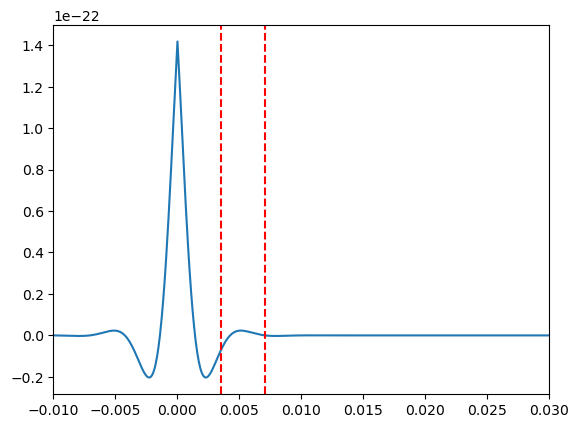

In [152]:
pl.plot(time_arr, signal221)
# pl.plot(time_arr, NR_signal220)
pl.xlim(-0.01, 0.03)
pl.axvline(10*mass, c='r', ls='--')
pl.axvline(20*mass, c='r', ls='--')

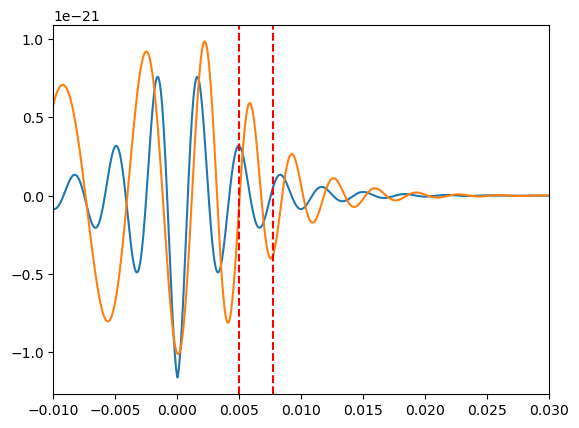

In [150]:
pl.plot(time_arr, signal33)
pl.plot(time_arr, NR_signal330)
pl.xlim(-0.01, 0.03)
pl.axvline(14*mass, c='r', ls='--')
pl.axvline(22*mass, c='r', ls='--')

In [143]:
np.savetxt("manualWaveform_22.txt", [signal22, time_arr])
np.savetxt("manualWaveform_33.txt", [signal33, time_arr])
np.savetxt("manualWaveform_22+33.txt", [signal22+signal33, time_arr])